In [40]:
import jax.numpy as jnp

import matplotlib.pyplot as plt


solver_name = "EKF1_2"
problem_name = "samples_from_prior_FHN"
prefix = f"{solver_name}_{problem_name}"
folder = "./"

delta = 1 / 128
N = 1 / delta
fineN = N ** 1.0
T = 1.0
N = T / delta
no_samples = 100

sampled_sols = jnp.load(f'{folder}/{prefix}_sampled_sols_{int(N)}_1.npy')
sampled_sols=jnp.insert(sampled_sols, 0, jnp.zeros((2, )), axis=1)
fine_em = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{int(N)}_{int(fineN)}.npy')
low_res_em = jnp.load(f'{folder}/{prefix}_pathwise_sols3_{int(N)}_{int(fineN)}.npy')
mean = jnp.load(f'{folder}/{prefix}_mean_pn_{int(N)}_1.npy')
var = jnp.load(f'{folder}/{prefix}_var_pn_{int(N)}_1.npy')
mean = jnp.insert(mean, 0, jnp.zeros((2, )), axis=0)
var = jnp.insert(var, 0, jnp.zeros((2, 2)), axis=0)

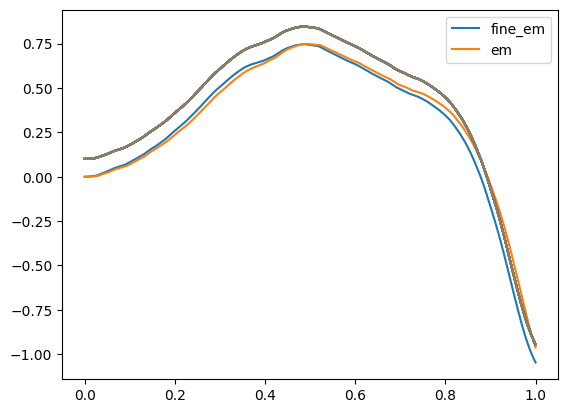

In [44]:
ts = jnp.linspace(0, 1, int(N)+1)
fine_ts = jnp.linspace(0, 1, int(N*fineN)+1)
plt.plot(fine_ts, fine_em[:,0], label="fine_em")
plt.plot(ts, low_res_em[:,0], label="em")
for i in range(100):
    plt.plot(ts, sampled_sols[i, :, 0]+0.1, alpha=0.1)
plt.legend()

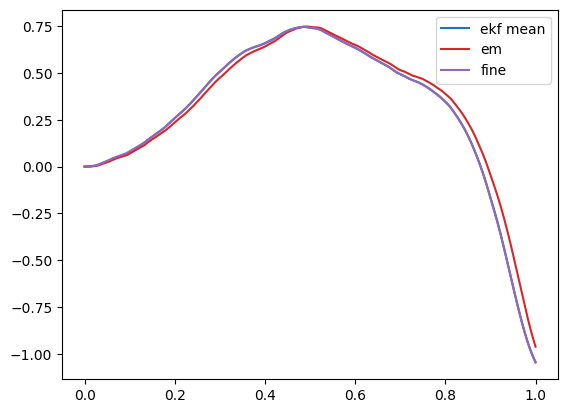

In [42]:
plt.plot(ts, mean[:,0], label="ekf mean")
plt.plot(ts, mean[:,0]+var[:,0,0]**0.5*1.96, alpha=0.1)
plt.plot(ts, mean[:,0]-var[:,0,0]**0.5*1.96, alpha=0.1)
plt.plot(ts, low_res_em[:,0], label="em")
plt.plot(fine_ts, fine_em[:,0], label="fine")
plt.legend()

In [43]:
jnp.save(f'{folder}/{prefix}_em_sol_fhn.npy', jnp.array([ts, low_res_em[:,0], low_res_em[:,1]]))
jnp.save(f'{folder}/{prefix}_fine_em_sol_fhn.npy', jnp.array([fine_ts, fine_em[:,0], fine_em[:,1]]))
jnp.save(f'{folder}/{prefix}_sampled_sols_ekf12_fhn.npy', jnp.array([ts, sampled_sols]))

ValueError: All input arrays must have the same shape.

In [ ]:
ts = jnp.linspace(0, 1, int(N)+1)
fine_ts = jnp.linspace(0, 1, int(N*fineN)+1)
plt.plot(fine_ts, fine_em[:,1], label="fine_em")
plt.plot(ts, low_res_em[:,1], label="em")
for i in range(100):
    plt.plot(ts, sampled_sols[i, :, 1], alpha=0.1)
plt.legend()

In [189]:
sampled_sols.shape

pydev debugger: Unable to find real location for: <string>
pydev debugger: Unable to find real location for: <frozen _collections_abc>
pydev debugger: Unable to find real location for: <frozen os>
pydev debugger: Unable to find real location for: /tmp/ipykernel_2862/1975854940.py


(100, 17, 2)

In [125]:
sampled_sols.reshape()

Array([[[ 0.        ,  0.        ],
        [-0.03685849,  0.10884507],
        [-0.14926448,  0.04951215],
        ...,
        [-0.98117065,  0.00561304],
        [-0.97905886, -0.0706915 ],
        [-0.9629679 , -0.11012513]],

       [[ 0.        ,  0.        ],
        [-0.03694198,  0.10652966],
        [-0.13542597,  0.04921332],
        ...,
        [-0.9764705 , -0.00685933],
        [-0.98043925, -0.07995417],
        [-0.95524096, -0.12373444]],

       [[ 0.        ,  0.        ],
        [-0.04205763,  0.11363413],
        [-0.15350486,  0.05941505],
        ...,
        [-0.96785736, -0.0125497 ],
        [-0.98471856, -0.07551517],
        [-0.95661205, -0.11448487]],

       ...,

       [[ 0.        ,  0.        ],
        [-0.04397872,  0.09917483],
        [-0.14209723,  0.05700439],
        ...,
        [-0.9821249 ,  0.00621617],
        [-0.97916365, -0.07876845],
        [-0.95751476, -0.11313707]],

       [[ 0.        ,  0.        ],
        [-0.04469266,  0.10

In [17]:
sampled_sols.shape

(100, 33, 2)

In [30]:
T1 = jnp.load('./EM_FHN/EM_FHN_pathwise_sols2_16_16.npy')
T2 = jnp.load('./EM_FHN/EM_FHN_pathwise_sols_16_1.npy')

In [31]:
T1

Array([[[ 0.00000000e+00,  0.00000000e+00],
        [-4.42752335e-03,  2.30067261e-02],
        [-9.79600176e-02,  2.12308422e-01],
        [-3.13418925e-01,  2.08216146e-01],
        [-6.94688976e-01,  3.17865670e-01],
        [-1.01436508e+00,  3.16977352e-01],
        [-1.11566496e+00,  3.77524942e-01],
        [-1.15150356e+00,  4.38392073e-01],
        [-1.13563943e+00,  2.41713077e-01],
        [-1.12477493e+00,  3.38457495e-01],
        [-1.11738598e+00,  2.82495618e-01],
        [-1.10960042e+00,  2.24186510e-01],
        [-1.09556365e+00,  1.84870809e-01],
        [-1.06725955e+00,  5.79049140e-02],
        [-1.01486957e+00, -1.86473299e-02],
        [-9.65887904e-01, -1.52575403e-01],
        [-9.33012545e-01, -1.69794023e-01]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 3.39861214e-02, -3.99959758e-02],
        [ 8.54868591e-02,  1.85826253e-02],
        [ 9.69259143e-02,  1.41541854e-01],
        [ 4.82764430e-02,  1.50620058e-01],
        [-8.44633207e-03,  8.2

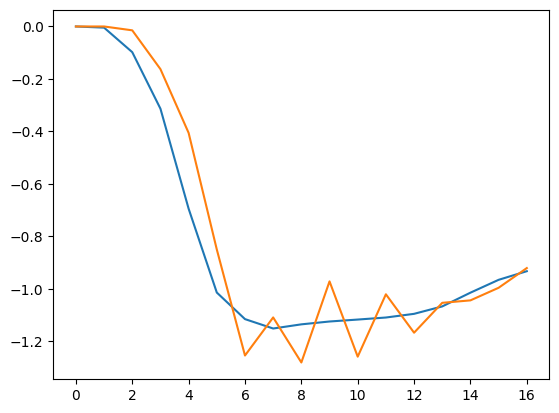

In [32]:
plt.plot(T1[0, :,0])
plt.plot(T2[0, :, 0])